Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


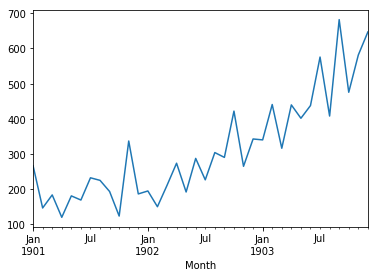

In [1]:
"""In this assignment students have to make ARIMA model over shampoo sales data and
check the MSE between predicted and actual value.
Student can download data in .csv format from the following link:

https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-
period#!ds=22r0&display=line"""



import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

df = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', header = 0,
                 parse_dates=[0], index_col =0, squeeze = True, date_parser = parser)
print(df.head())
df.plot()

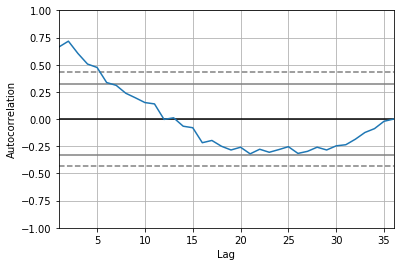

In [2]:
# As we can see from the graph the data is a complete trend.
# we can make it stationary bt differencing atleast by 1 degree.
# Lets have a look at the auto corelation plot of the series.

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)

predicted=349.117712, expected=342.300000
predicted=306.512952, expected=339.700000
predicted=387.376449, expected=440.400000
predicted=348.154255, expected=315.900000
predicted=386.308818, expected=439.300000
predicted=356.082087, expected=401.300000
predicted=446.379462, expected=437.400000
predicted=394.737224, expected=575.500000
predicted=434.915402, expected=407.600000
predicted=507.923547, expected=682.000000
predicted=435.482779, expected=475.300000
predicted=652.743826, expected=581.300000
predicted=546.343519, expected=646.900000
Test MSE: 6958.324


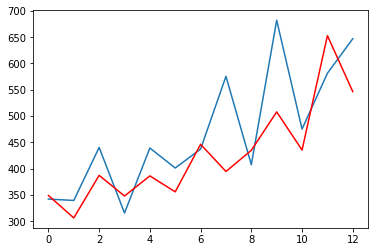

In [3]:
# As we can see from the plot till 5 lags the correlation is not significant
# Let's take the no of lags as 5 and appy the ARIMA model

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
